<Body>   
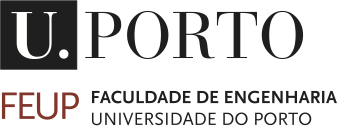   
<h1> <b>Assignment 2  - 2023/2024 </b> </h1>

</Body>  
---


# Introduction

In this assignment, you will encounter both pen-and-paper exercises and coding tasks to be solved using Python 3 and the NumPy library. To complete each exercise, utilize the designated cell within this Jupyter notebook.

For the pen-and-paper exercises, you have the option to submit either a typeset solution or a good-quality digitalized version of your handwritten solution.

As for the Python exercises:

- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code.
- Make sure that the output of all code cells is visible in your submitted notebook. The evaluator will NOT execute your code before grading your submission.
   
Please identify the authors of this assignment in the cell below.

### Author 1: Geoffrey Oliver Tavares Spencer, 202300501

# **Activity 1** - Generative and Discriminative Classifiers

Consider a two-dimensional class problem with two classes ($C_1$ and $C_2$), characterized by Gaussian distributions with means $\mu_1=\left(1,0\right)^\top$ and $\mu_2=\left(2,1\right)^\top$, and covariances
$\Sigma_1 = \Sigma_2 = \left[\begin{array}{cc} 1 & -0.9 \\ -0.9 & 2\end{array}\right]$, respectively. Assume the classes are equiprobable.




## **1.1** Obtain a dataset consisting from $100$ points from each class and plot the data. Estimate the two models (MLE) using only this data.

Model 1:
 [0.85496804 0.22213309]    [[ 0.81274014 -0.76530586]
 [-0.76530586  2.02275808]]
Model 2:
 [1.89003621 1.12393985]    [[ 0.95397578 -0.89877316]
 [-0.89877316  1.75275702]]


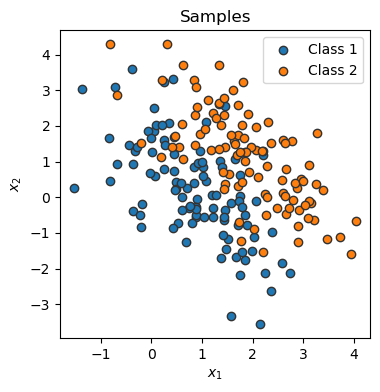

In [517]:
# Activity 1.1 (to be completed)

import numpy as np
import matplotlib.pyplot as plt

## Visualize the data considering two classes

def visualize_samples(data, label):
    data_1 = data[label == 1]
    data_2 = data[label == 2]

    plt.figure(figsize=(4,4))
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.scatter(data_2[:,0], data_2[:,1], edgecolor="#333", label="Class 2")
    plt.title("Samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend(loc="upper right")


## to make sure we have always the same data

np.random.seed(10)

## Distribution for class 1

mu_1 = np.transpose(np.array([1, 0]))
#print('mu_1 = \n', mu_1)

sigma_1 = np.array([[1, -0.9],[-0.9, 2]])
#print('sigma_1 = \n', sigma_1)

## Distribution for class 2

mu_2 = np.transpose(np.array([2, 1]))
#print('mu_2 = \n', mu_2)

sigma_2 = np.array([[1, -0.9],[-0.9, 2]])
#print('sigma_2 = \n', sigma_2)

# Sample from class distributions
size_1 = 100
size_2 = 100
size_total = size_1 + size_2

X_1 = np.random.multivariate_normal(mu_1, sigma_1, size_1)
X_2 = np.random.multivariate_normal(mu_2, sigma_2, size_2)

X   =  np.concatenate([X_1, X_2], axis = 0)                             # join both xs in one array (axis = 0)
Y = np.concatenate((np.ones(size_1), np.ones(size_2) * 2), axis = 0)    # axis 0 is assumed as column, and 1 is assumed as row

#Estimate the Models
mu_measured_1    = np.mean(X_1, axis = 0)
#print('X_1 = \n', X_1)
mu_measured_2    = np.mean(X_2, axis = 0)
#print('X_2 = \n', X_2)

sigma_measured_1 = np.cov(X_1.T)
#print('sigma_measured_1 = \n', sigma_measured_1)
sigma_measured_2 = np.cov(X_2.T)
#print('sigma_measured_2 = \n', sigma_measured_2)

print("Model 1:\n", mu_measured_1, "  ", sigma_measured_1)
print("Model 2:\n", mu_measured_2, "  ", sigma_measured_2)

#Show data
visualize_samples(X, Y)

## **1.2** Assign each point of the dataset to either $C_1$ or $C_2$, according to the Bayes decision rule. Estimate the classification probability error and plot the classification regions.


Classification probability error: 0.125


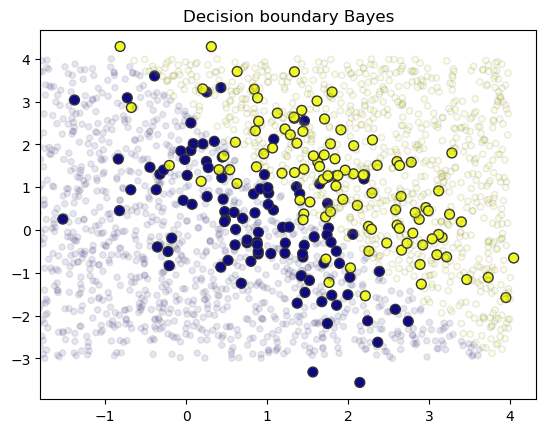

In [518]:
# Activity 1.2 (to be completed)

## multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    
    exp_term = np.exp(-0.5 * np.dot(np.dot(d.T, np.linalg.inv(cov)), d))
    f_term = 1 / (np.sqrt((2 * np.pi) * (np.linalg.det(cov))))
    pdf = f_term * exp_term
    
    return pdf

## Bayes Prediction
def prediction_bayes(X, mu_1, sigma_1, mu_2, sigma_2, Prior_C1, Prior_C2):
    classification = []
    for x in X:       
        likelihood_C1 = gaussian(x, mu_1, sigma_1)      #P(X|C1)
        likelihood_C2 = gaussian(x, mu_2, sigma_2)      #P(X|C2)
            
        posterior_C1 = (likelihood_C1 * Prior_C1) / ((likelihood_C1 * Prior_C1) + (likelihood_C2 * Prior_C2))   #P(C1|X)=(P(X|C1)*P(C1))/P(X)
        posterior_C2 = (likelihood_C2 * Prior_C2) / ((likelihood_C1 * Prior_C1) + (likelihood_C2 * Prior_C2))   #P(C2|X)=(P(X|C2)*P(C2))/P(X)
        
        if posterior_C1 > posterior_C2:
            classification.append(1)  # Class 1
        else:
            classification.append(2)  # Class 2
    return classification


## calculate the classification probability error
def calculate_error (preditor, label):
    Pe = 0
    size_sample = len(preditor)
    incorrect_count = np.sum(preditor != label)
    Pe = (incorrect_count / len(label))
    return Pe

## A priori probabilities
P_class1 = 0.5
P_class2 = 0.5

## classify each data point (using Bayesian classification theorem)
predition = prediction_bayes(X, mu_1, sigma_1, mu_2, sigma_2, P_class1, P_class2)

## calculate classification error
Pe = calculate_error(predition, Y)
print('Classification probability error:', Pe)


# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
ynew = prediction_bayes(Xnew, mu_1, sigma_1, mu_2, sigma_2, P_class1, P_class2)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim);
plt.title("Decision boundary Bayes")
plt.show()

## **1.3** Assign each point of the dataset to either $C_1$ or $C_2$, using the Naive Bayes classifier. Estimate the classification probability error and plot the classification regions.

Classification probability error Naive Bayes: 0.16


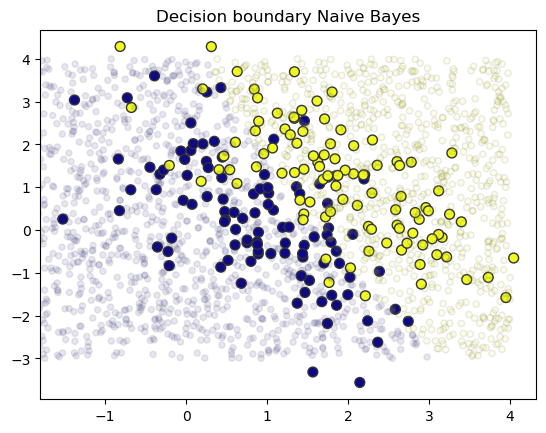

In [519]:
# Activity 1.3 Naive (to be completed)

## 1D normal distribution
def gaussian1d(x, mean, var):
    #exp_term1D = np.exp(-((x-mean)**2)/(2 * var))
    #f_term1D = (1/np.sqrt(2 * np.pi * var))
    #pdf = f_term1D * exp_term1D
    pdf = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x-mean)**2) / (2 * var))
    return pdf

## Naive Bayes Prediction
def prediction_naive_bayes(X, mu_1, sigma_1, mu_2, sigma_2, Prior_C1, Prior_C2):
    classification = []
    for x in X:
        likelihood_C1 = np.prod(gaussian1d(x, mu_1, sigma_1))      #P(X|C1)
        likelihood_C2 = np.prod(gaussian1d(x, mu_2, sigma_2))      #P(X|C2)
            
        posterior_C1 = (likelihood_C1 * Prior_C1) / ((likelihood_C1 * Prior_C1) + (likelihood_C2 * Prior_C2))   #P(C1|X)=(P(X|C1)*P(C1))/P(X)
        posterior_C2 = (likelihood_C2 * Prior_C2) / ((likelihood_C1 * Prior_C1) + (likelihood_C2 * Prior_C2))   #P(C2|X)=(P(X|C2)*P(C2))/P(X)

        if posterior_C1 > posterior_C2:
            classification.append(1)
        else:
            classification.append(2)
            
    return classification


# A priori probabilities
P_class1 = 0.5
P_class2 = 0.5

var_1_measured = np.var(X_1, axis = 0)
var_2_measured = np.var(X_2, axis = 0)

# classify each data point (using Bayesian classification theorem)
predition_naive_bayes =  prediction_naive_bayes(X, mu_measured_1, var_1_measured, mu_measured_2, var_2_measured, P_class1, P_class2)

# calculate classification error
Pe = calculate_error(predition_naive_bayes, Y)
print('Classification probability error Naive Bayes:', Pe)


# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
ynew = prediction_naive_bayes(Xnew, mu_measured_1, var_1_measured, mu_measured_2, var_2_measured, P_class1, P_class2)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim);
plt.title("Decision boundary Naive Bayes")
plt.show()

## **1.4** Consider the loss matrix $L=\left[\begin{array}{cc} 0 & 1 \\ 0.09 & 0\end{array}\right]$. Assign each point of the dataset to $C_1$ or $C_2$ according to the average risk minimization rule and the Bayes decision rule (not the Naive Bayes). Plot the points with different colors, depending on the class they are assigned to. Estimate the average risk for this loss matrix.


Classification probability error using Risk: 0.26
Average risk: 0.50795


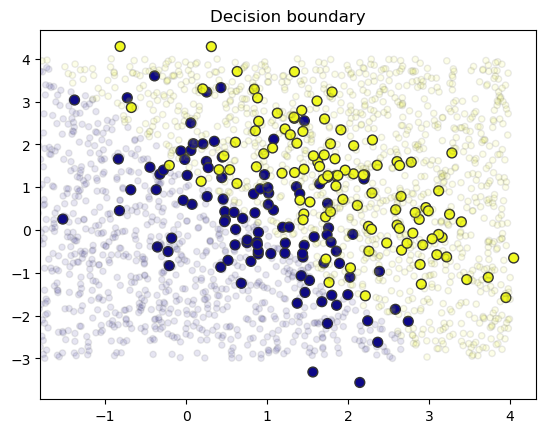

In [520]:
# Activity 1.4 (to be completed)

## loss matrix entries
L_risk = np.array([[0, 1], [0.09, 0]])

## Bayes classifier using risk matrix
def prediction_bayes_risk(X, mu_1, sigma_1, mu_2, sigma_2, Prior_C1, Prior_C2, Risks):
    classification = []
    L12 = Risks[0, 1]
    L21 = Risks[1, 0]
    
    for x in X: 
        likelihood_C1 = gaussian(x, mu_1, sigma_1)      #P(X|C1)
        likelihood_C2 = gaussian(x, mu_2, sigma_2)      #P(X|C2)
            
        posterior_C1 = (likelihood_C1 * Prior_C1) / ((likelihood_C1 * Prior_C1) + (likelihood_C2 * Prior_C2))   #P(C1|X)=(P(X|C1)*P(C1))/P(X)
        posterior_C2 = (likelihood_C2 * Prior_C2) / ((likelihood_C1 * Prior_C1) + (likelihood_C2 * Prior_C2))   #P(C2|X)=(P(X|C2)*P(C2))/P(X) 
        
        risk_C1 = L21 * posterior_C1
        risk_C2 = L12 * posterior_C2
        
        if risk_C1 > risk_C2:
            classification.append(1)
        else:
            classification.append(2)
    
    return classification

## Calculate the average risk
def calc_average_risk(predition, label, Risks):
    Ar  = 0
    L12 = Risks[0, 1]
    L21 = Risks[1, 0]
    
    size_total = len(label)
    for i in range(size_total):
        if label[i] == 1:
            Ar += L21 * (predition[i] == 1)
        else:
            Ar += L12 * (predition[i] == 2)
    
    Ar = Ar/size_total
    return Ar

## A priori probabilities
P_class1 = 0.5
P_class2 = 0.5

## classify each data point considering the risk
predition = prediction_bayes_risk(X, mu_measured_1, sigma_measured_1, mu_measured_2, sigma_measured_2, P_class1, P_class2, L_risk)

## calculate classification error
Pe = calculate_error(predition, Y)
print('Classification probability error using Risk:', Pe)


# determine average risk
Ar = calc_average_risk(predition, Y, L_risk)
print('Average risk:', Ar)


# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
ynew = prediction_bayes_risk(Xnew, mu_measured_1, sigma_measured_1, mu_measured_2, sigma_measured_2, P_class1, P_class2, L_risk)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim);
plt.title("Decision boundary")
plt.show()

## **1.5**: justify if the Bayesian classification is in fact equivalent to the minimization of the Mahalanobis distance for this particular case. Provide the assumptions that were considered during your analysis.



> SOLUTION for this theoretical exercise:

Assumptions:
Considering the case, where the classes are represent a Gaussian Distribution, the Bayes Classification rule can be considered equivalent to the minimization of the MAhalanobis distance given:

$Bayes Decision Rule = P(C|X) = \frac{P(x|\boldsymbol{C}_i) * P(\boldsymbol{c}_i)}{P(X)} $; with $P(x|\boldsymbol{C}_i) = \frac{1}{(2\pi)^{d/2}|\boldsymbol{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)$

and

$Mahanalobis Distance = \sqrt{(\mathbf{x} - \boldsymbol{\mu}_i)^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}_i)}$


i) In Bayes Classification, the likelihood of the data given each class is modeled by Gaussian Distribution, as in Mahalanobis distance, where data in each class follows a multivariate Gaussian Distribution;

ii) in the scenario, both classes present equals covariance matrix, a condition adopted in Mahalanobis distance metric, using the inverse of covariance matrix. in the case both classes sharing the same covariance matrix, the effect of the matrix on the Mahanalobis distance becomes constant for all points, making it equivalent to the Bayes Classification;

iii) For the equivalent priors considered in this scenario for both classes, also aligns with the decision rule based on the mMahanalobis distance for not affecting the calculation of te distance metric.

For an observation x, the i-th log-discrimant function is: 


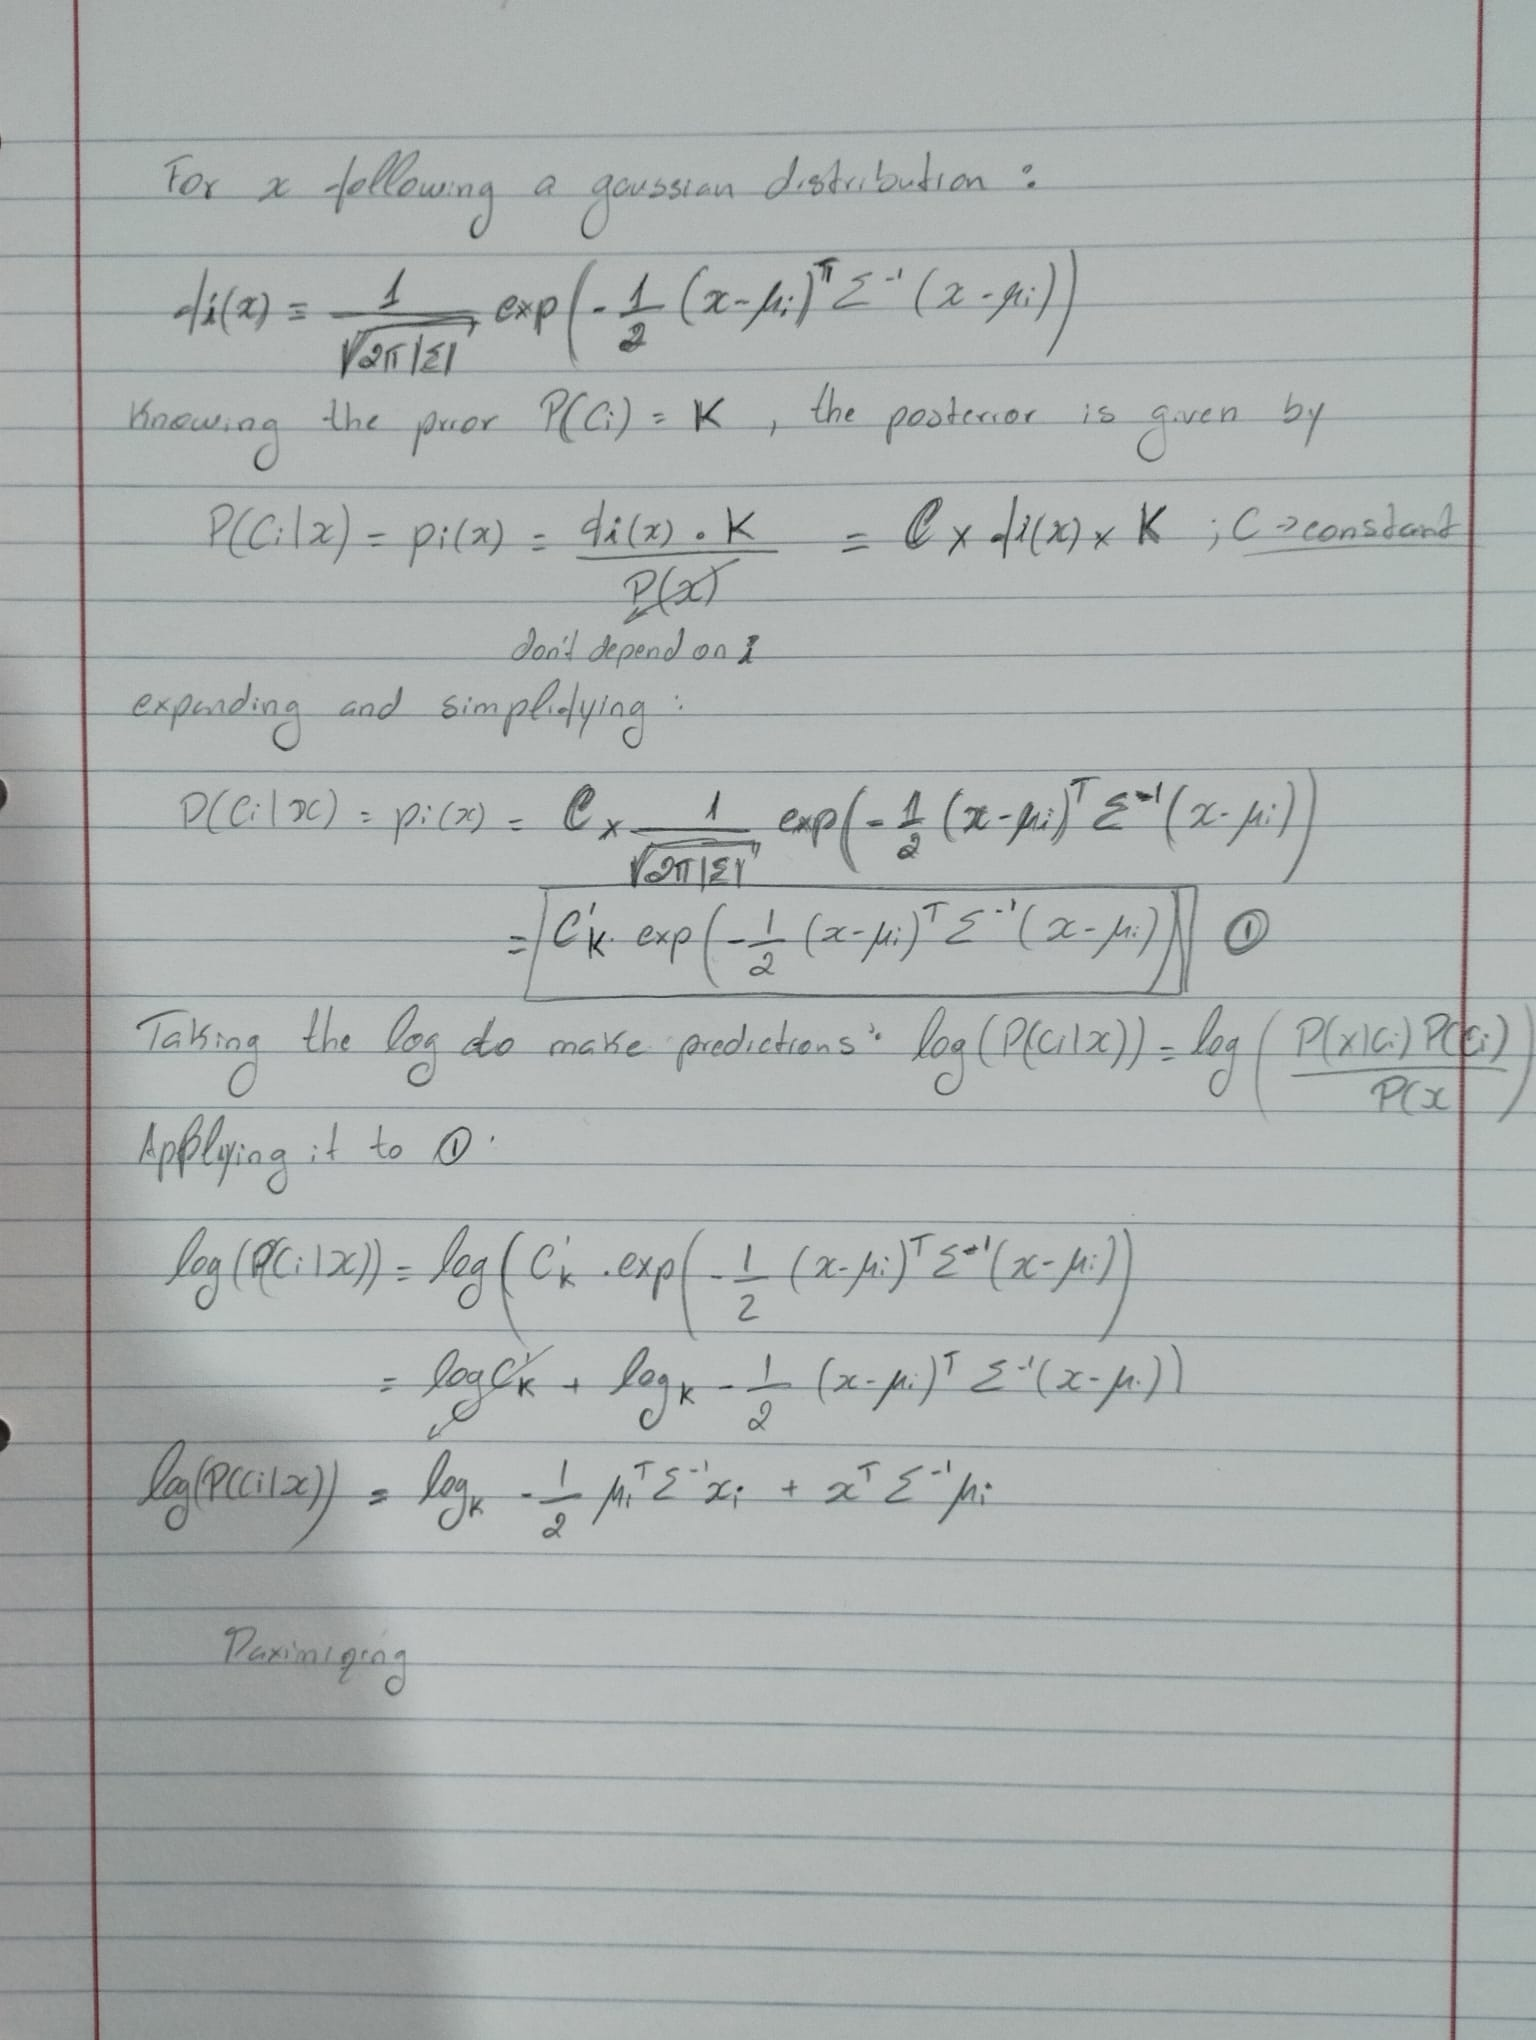

In [521]:

from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

display(Image(filename = '1_5_assignment2.jpeg'))

## **1.6** Perform logistic regression and use the data set to estimate the involved parameter vector $w$. Evaluate the classification error of the resulting classifier and plot the decision boundary.







In [522]:
# Activity 1.6 (to be completed)

#Sigmoid function
def sig(p):
    return 1 / (1 + np.exp(-p))
"""
sig(0)
print(sig(0))
"""

## Gradient
def nabla_f(w, x, y): 
    z = np.dot(x, w)
    A = sig(z)
    #cost = -(1/m)*np.sum( y * np.log(A) + (1-y) * np.log(1-A))
    
    #gradient descent
    gradient = np.dot(x.T, (A - y))           #dW = (A - Y).X^t
    
    #gradient_2 = np.subtract(A, y)           #dB = (A - Y)
    #B = B - A * gradient_2
    
    return gradient
    
    
### Gradient Descent technique
def logisticregression_gradient_descent(w,x,y, lam = 0.001, TOL = np.power(10.,-8), max_iter = 1000):
    """
    w        - (D+1) model vector for gradient descent iteration
    x        - (nxD+1) input features
    y        - (nx1) label vector (0 or 1 values)
    lam      - (scalar) learning rate
    TOL      -  (scalar) stoping criteria - maximum tolerance used in the gradient convergency
    max_iter -  (scalar) stoping criteria - maximum iteration

    returns
    w       - (D+1) model vector
    count   - number of iterations needed

    """
    counter = 0
    for _ in range(max_iter):
        gradient = nabla_f(w, x, y)
        w_new = w - lam * gradient
        if np.all(np.abs(w_new) <= TOL):
            break
        else:
            w = w_new
        counter += 1

        
        #https://realpython.com/gradient-descent-algorithm-python/
        
    return w, counter


In [523]:
# Prepare data
X_data = np.concatenate((np.array([np.ones(X.shape[0])]).T, X), axis = 1)
Y      = Y.reshape((len(Y), 1))
W      = np.matrix(np.ones(X_data.shape[1])*0.1).T

# Classes should be 0 or 1 to match the sigmoid function.
Y_log = Y - 1

### Gradient Descent:
W_gd, counter = logisticregression_gradient_descent(W, X_data, Y_log)
print('Solution W gd = ', W_gd)

# Classify using the Logistic Regression model
"""sig(0)
print(sig(0))"""
predition_logistic_gd = sig(np.dot(X_data, W_gd))
#print(B)

# calculate Error
print("Error Logistic Regression is:", calculate_error(predition_logistic_gd, Y_log.ravel()))

Solution W gd =  [[-4.24562385]
 [ 2.38364359]
 [ 1.44015247]]
Error Logistic Regression is: 200.0


In [524]:
## confirm results using sklearn:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X, Y.ravel())
np.set_printoptions(suppress=True)
print('Logistic regression sklearn, W0 = ', clf.intercept_)
print('Logistic regression sklearn, W = ', clf.coef_)

X_data = np.concatenate((np.array([np.ones(X.shape[0])]).T, X), axis = 1)
Y =  Y - 1
W = np.insert(clf.coef_, 0, clf.intercept_, axis = 1)

predition_logistic_sk = clf.predict(X) - 1
print("Error Sk Logistic Regression is:", calculate_error(predition_logistic_sk, Y.ravel()))

Logistic regression sklearn, W0 =  [-4.04925022]
Logistic regression sklearn, W =  [[2.25494442 1.36688658]]
Error Sk Logistic Regression is: 0.135


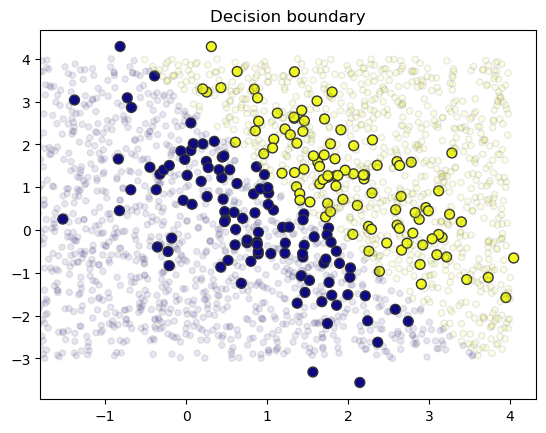

In [525]:
# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
Xnew = np.concatenate((np.array([np.ones(Xnew.shape[0])]).T, Xnew), axis = 1)
ynew = (sig(Xnew @ W.T) > 0.5).astype(int)  + 1

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=predition_logistic_sk, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 1], Xnew[:, 2], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim);
plt.title("Decision boundary")
plt.show()

----------------------

It's done!